In [3]:
import numpy as np
import pandas as pd
import csv
import statistics
import matplotlib.pyplot as plt

**READ IN CSVs PRODUCED BY two_photon & edgescore scripts**

In [15]:
max_dff_ordered=pd.read_csv('max_dff_subset_ordered.csv')
mean_dff_ordered=pd.read_csv('mean_dff_subset_ordered.csv')
ns_stim_exp=pd.read_csv('ns_stim_frame_presentation.csv')
pref_ori_ordered=pd.read_csv('pref_ori_ordered_subset.csv')
edge_scores=pd.read_csv('edge_scores.csv')

**FIND AVERAGE DFF FOR EACH IMAGE FOR EACH CELL (AVERAGING ACROSS THE 50 REPLICATES OF EACH STIM PRESENTATION)**

In [9]:
# adjust frame numbers by adding 1 to account for the -1 to 117 frame range to make indexing easier
list_ns_stim_exp=list(ns_stim_exp.frame)
list_ns_stim_exp_adjusted=[int(i + 1) for i in list_ns_stim_exp]

In [10]:
# transpose dff dataframes to prepare to associate with each natural scene frame
max_dff_ordered_t=max_dff_ordered.T
mean_dff_ordered_t=mean_dff_ordered.T

In [12]:
# produce a list of lists for the average MAX dff of each cell for each image (averaging across each 50 replicate)

avg_max_dff_stim_all=[] # a list of lists: 80 lists (one for each cell), len 119 each list (avg max dff for each stim)

for j in range(len(max_dff_ordered)): # for each cell
    
    img_max_dff_i=[[]for _ in range(len(edge_scores))] # empty list of 119 lists for each image
    
    for i in range(1, len(max_dff_ordered_t)-1): # adding max dff scores, sorted into each list by frame number
        frame=list_ns_stim_exp_adjusted[i]
        max_dff=max_dff_ordered_t[j][i+1]
        img_max_dff_i[frame].append(max_dff)

    avg_max_dff_i=[]
    
    for k in range(len(img_max_dff_i)):
        avg_max_dff=statistics.mean(img_max_dff_i[k])
        avg_max_dff_i.append(avg_max_dff) # list to be 119 long, averages of img_max_dff_i

    avg_max_dff_stim_all.append(avg_max_dff_i)

In [13]:
# produce a list of lists for the average MEAN dff of each cell for each image (averaging across each 50 replicate)

avg_mean_dff_stim_all=[] # a list of lists: 80 lists (one for each cell), len 119 each list (avg mean dff for each stim)

for j in range(len(mean_dff_ordered)): # for each cell
    
    img_mean_dff_i=[[]for _ in range(len(edge_scores))] # empty list of 119 lists for each image
    
    for i in range(1, len(mean_dff_ordered_t)-1): # adding mean dff scores, sorted into each list by frame number
        frame=list_ns_stim_exp_adjusted[i]
        mean_dff=mean_dff_ordered_t[j][i+1]
        img_mean_dff_i[frame].append(mean_dff)

    avg_mean_dff_i=[]
    
    for k in range(len(img_mean_dff_i)):
        avg_mean_dff=statistics.mean(img_mean_dff_i[k])
        avg_mean_dff_i.append(avg_mean_dff) # list to be 119 long, averages of img_mean_dff_i

    avg_mean_dff_stim_all.append(avg_mean_dff_i)

In [17]:
pref_ori_ordered

,cell_specimen_id,pref_ori
0,662199605,90
1,662199626,90
2,662199683,120
3,662199697,0
4,662199710,0
...,...,...
117,662203014,90
118,662203030,60
119,662203048,60
120,662203077,90


**SUBSET pref_ori_ordered BY PREFERRED DEGREE**

In [25]:
cell_pref_0=[]
cell_pref_30=[]
cell_pref_60=[]
cell_pref_90=[]
cell_pref_120=[]
cell_pref_150=[]

def subset_pref_ori (list_cell_pref, degree):
    for i in range(len(pref_ori_ordered)):
        if pref_ori_ordered.loc[i]['pref_ori'] == degree:
            list_cell_pref.append(pref_ori_ordered.loc[i]['cell_specimen_id'])

subset_pref_ori(cell_pref_0, 0)
subset_pref_ori(cell_pref_30, 30)
subset_pref_ori(cell_pref_60, 60)
subset_pref_ori(cell_pref_90, 90)
subset_pref_ori(cell_pref_120, 120)

In [28]:
False in max_dff_ordered['cell_specimen_id']==pref_ori_ordered['cell_specimen_id']
# the cell IDs and indexes align, which is why I can do this:

False

**AVERAGE THE DFF ACROSS CELLS WITH A PREFERRED ORIENTATION FOR EACH IMAGE**

In [29]:
def pref_ori_avg_dff(cell_pref, cell_pref_max, cell_pref_mean):
    for i in range(len(cell_pref)):
        cell_index=pref_ori_ordered.index[pref_ori_ordered['cell_specimen_id']==cell_pref[i]][0]
        cell_pref_max.append(avg_max_dff_stim_all[cell_index])
        cell_pref_mean.append(avg_mean_dff_stim_all[cell_index])

def avg_pref_ori(cell_pref_max, cell_pref_mean, mean_cells_max, mean_cells_mean):
    # transpose inputs
    cell_pref_max_t=list(map(list, zip(*cell_pref_max)))
    cell_pref_mean_t=list(map(list, zip(*cell_pref_mean)))
    for i in range(len(cell_pref_max_t)):
        avg_max_activity=statistics.mean(cell_pref_max_t[i])
        avg_mean_activity=statistics.mean(cell_pref_mean_t[i])
        mean_cells_max.append(avg_max_activity)
        mean_cells_mean.append(avg_mean_activity)

In [31]:
# make empty lists
pref_0_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_0_avg_mean_dff=[] # same vibe here

mean_cells_0_avg_max=[] # mean activity across cells for each img
mean_cells_0_avg_mean=[] # same vibe here

pref_30_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_30_avg_mean_dff=[] # same vibe here

mean_cells_30_avg_max=[] # mean activity across cells for each img
mean_cells_30_avg_mean=[] # same vibe here

pref_60_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_60_avg_mean_dff=[] # same vibe here

mean_cells_60_avg_max=[] # mean activity across cells for each img
mean_cells_60_avg_mean=[] # same vibe here

pref_90_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_90_avg_mean_dff=[] # same vibe here

mean_cells_90_avg_max=[] # mean activity across cells for each img
mean_cells_90_avg_mean=[] # same vibe here

pref_120_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_120_avg_mean_dff=[] # same vibe here

mean_cells_120_avg_max=[] # mean activity across cells for each img
mean_cells_120_avg_mean=[] # same vibe here

pref_150_avg_max_dff=[] # list of lists: len 1 is number cells, len 2 is number images
pref_150_avg_mean_dff=[] # same vibe here

mean_cells_150_avg_max=[] # mean activity across cells for each img
mean_cells_150_avg_mean=[] # same vibe here

In [32]:
# now do it

# 0
pref_ori_avg_dff(cell_pref_0, pref_0_avg_max_dff, pref_0_avg_mean_dff)
avg_pref_ori(pref_0_avg_max_dff, pref_0_avg_mean_dff, mean_cells_0_avg_max, mean_cells_0_avg_mean)

# 30
pref_ori_avg_dff(cell_pref_30, pref_30_avg_max_dff, pref_30_avg_mean_dff)
avg_pref_ori(pref_30_avg_max_dff, pref_30_avg_mean_dff, mean_cells_30_avg_max, mean_cells_30_avg_mean)

# 60
pref_ori_avg_dff(cell_pref_60, pref_60_avg_max_dff, pref_60_avg_mean_dff)
avg_pref_ori(pref_60_avg_max_dff, pref_60_avg_mean_dff, mean_cells_60_avg_max, mean_cells_60_avg_mean)

# 90
pref_ori_avg_dff(cell_pref_90, pref_90_avg_max_dff, pref_90_avg_mean_dff)
avg_pref_ori(pref_90_avg_max_dff, pref_90_avg_mean_dff, mean_cells_90_avg_max, mean_cells_90_avg_mean)

# 120
pref_ori_avg_dff(cell_pref_120, pref_120_avg_max_dff, pref_120_avg_mean_dff)
avg_pref_ori(pref_120_avg_max_dff, pref_120_avg_mean_dff, mean_cells_120_avg_max, mean_cells_120_avg_mean)

# 150
pref_ori_avg_dff(cell_pref_150, pref_150_avg_max_dff, pref_150_avg_mean_dff)
avg_pref_ori(pref_150_avg_max_dff, pref_150_avg_mean_dff, mean_cells_150_avg_max, mean_cells_150_avg_mean)

IndexError: list index out of range

In [14]:
# ok so now we have: mean neural activity for each image type subsetted by cell preferred orientation
# orientation in this case I centered around 0, 30, 60, 90, 120, 150, +/- 15 degrees
# next step, make a dataframe where we have these activity values for each preferred orientation and each edge score: should be easy

In [15]:
activity_w_edge_scores=edge_scores.copy(True)

activity_w_edge_scores['max_dff_0']=mean_cells_0_avg_max
activity_w_edge_scores['mean_dff_0']=mean_cells_0_avg_mean

activity_w_edge_scores['max_dff_30']=mean_cells_30_avg_max
activity_w_edge_scores['mean_dff_30']=mean_cells_30_avg_mean

# activity_w_edge_scores['max_dff_60']=mean_cells_60_avg_max
# activity_w_edge_scores['mean_dff_60']=mean_cells_60_avg_mean

activity_w_edge_scores['max_dff_90']=mean_cells_90_avg_max
activity_w_edge_scores['mean_dff_90']=mean_cells_90_avg_mean

activity_w_edge_scores['max_dff_120']=mean_cells_120_avg_max
activity_w_edge_scores['mean_dff_120']=mean_cells_120_avg_mean

# activity_w_edge_scores['max_dff_150']=mean_cells_150_avg_max
# activity_w_edge_scores['mean_dff_150']=mean_cells_150_avg_mean



In [16]:
activity_edge_30=list(zip(list(activity_w_edge_scores['30']), list(activity_w_edge_scores['max_dff_30'])))
activity_edge_30.sort(key=lambda x: x[0])

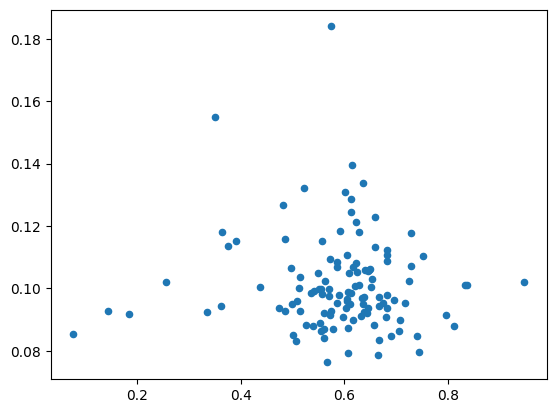

In [17]:
edge_score_30, activity_30 =list(zip(*activity_edge_30))

plt.scatter(edge_score_30, activity_30, marker="o", s=20)

In [18]:
activity_edge_90=list(zip(list(activity_w_edge_scores['90']), list(activity_w_edge_scores['max_dff_90'])))
activity_edge_90.sort(key=lambda x: x[0])

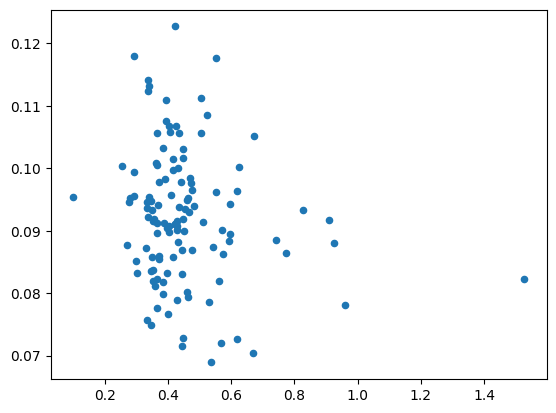

In [19]:
edge_score_90, activity_90 =list(zip(*activity_edge_90))

plt.scatter(edge_score_90, activity_90, marker="o", s=20)

In [20]:
activity_edge_120=list(zip(list(activity_w_edge_scores['120']), list(activity_w_edge_scores['max_dff_120'])))
activity_edge_120.sort(key=lambda x: x[0])

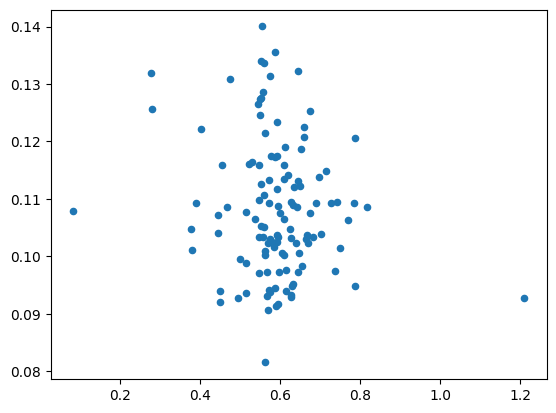

In [21]:
edge_score_120, activity_120 =list(zip(*activity_edge_120))

plt.scatter(edge_score_120, activity_120, marker="o", s=20)